In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

In [7]:
data = pd.read_csv('/home/kiran/kk.csv', header = None)

X = np.array(data.iloc[:, 0:2]) 
y = np.array(data.iloc[:,2])
y.shape = (len(y), 1)


In [8]:
pos_plot = data[data[2] == 1]
neg_plot = data[data[2] == 0]

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


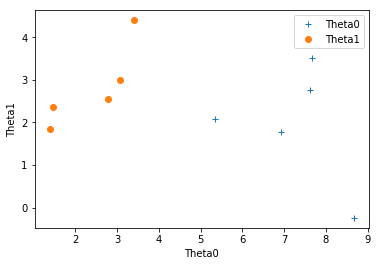

In [9]:
print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.')

plt.plot(pos_plot[0], pos_plot[1], "+", label = "Theta0")
plt.plot(neg_plot[0], neg_plot[1], "o", label = "Theta1")
plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.legend()
plt.show()


In [10]:
def sigmoid(z):
    
    g = 1 / (1 + np.exp(-z))
    return g

In [11]:
def costFunction(theta, X, y):
    
    m = len(y) 

    h = sigmoid(X.dot(theta)) 
    J = (1/m) * np.sum((-y*np.log(h)) - ((1-y)*np.log(1-h)))

   
    return J

In [12]:

def gradient(theta, X, y):
    m = len(y)
    grad = np.zeros((theta.shape))
    h = sigmoid(X.dot(theta))
    for i in range(len(theta)): 
        XT = X[:,i]
        XT.shape = (len(X),1)
        grad[i] = (1/m) * np.sum((h-y)*XT) 
    return grad


In [13]:
Bias = np.ones((len(X), 1))
X = np.column_stack((Bias, X))


In [14]:
initial_theta = np.zeros((len(X[0]), 1))



(cost, grad) = costFunction(initial_theta, X, y), gradient(initial_theta, X, y)

print('Cost at initial theta (zeros): %f' % cost)
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros):')
print(grad)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628')



Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
[[ 0.        ]
 [-1.20682336]
 [ 0.21415174]]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


In [15]:

test_theta = np.array([[-24], [0.2], [0.2]]);
(cost, grad) = costFunction(test_theta, X, y), gradient(test_theta, X, y)

print('\nCost at test theta: %f' % cost)
print('Expected cost (approx): 0.218\n')
print('Gradient at test theta:')
print(grad)
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n')



Cost at test theta: 11.077656
Expected cost (approx): 0.218

Gradient at test theta:
[[-0.5       ]
 [-3.62317443]
 [-0.9885447 ]]
Expected gradients (approx):
 0.043
 2.566
 2.647



In [16]:

result = op.fmin_tnc(func = costFunction, x0 = initial_theta, fprime = gradient, args = (X,y))
result[1]


Result = op.minimize(fun = costFunction, 
                                 x0 = initial_theta, 
                                 args = (X, y),
                                 method = 'TNC',
                                 jac = gradient, options={'gtol': 1e-3, 'disp': True, 'maxiter': 1000})


theta = Result.x
theta

test = np.array([[1, 45, 85]]) 
prob = sigmoid(test.dot(theta))
print('For dataset 45 and 85, we predict probability of %f,' % prob)
print('Expected value: 0.775 +/- 0.002\n')

For dataset 45 and 85, we predict probability of 0.500000,
Expected value: 0.775 +/- 0.002

